# (Aug 2020 Bay Wheels Ride Exploratory Data Analysis)
## by (Abdulrahman Gamil Ali)

## Preliminary Wrangling

> The system was originally launched as Bay Area Bike Share in August 2013. At launch, it became the first regional bicycle sharing system deployed on the West Coast of the United States and also the first regional system in the U.S. that services more than just a single city or adjacent cities. The original system was described as a pilot program and consisted of only 700 bicycles with 70 stations, 34 of which were in San Francisco. The program's original administrator was the Bay Area Air Quality Management District, which handed off the public management of the system to the Metropolitan Transportation Commission in 2016. The launch system was funded with $ 11.2 million of public funds from a variety of sources, including from the MTC and Air District. 

#  Bay Wheels Ride 


> The system was originally launched as Bay Area Bike Share in August 2013. At launch, it became the first regional bicycle sharing system deployed on the West Coast of the United States and also the first regional system in the U.S. that services more than just a single city or adjacent cities. The original system was described as a pilot program and consisted of only 700 bicycles with 70 stations, 34 of which were in San Francisco. The program's original administrator was the Bay Area Air Quality Management District, which handed off the public management of the system to the Metropolitan Transportation Commission in 2016. The launch system was funded with $ 11.2 million of public funds from a variety of sources, including from the MTC and Air District. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
bayWheels = pd.read_csv('202008-baywheels-tripdata.csv')
bayWheels.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,6549E11C13124B5F,electric_bike,2020-08-14 09:41:03,2020-08-14 10:03:45,NaN,NaN,Illinois St at 20th St,376.0,37.790000,-122.420000,37.760320,-122.387456,casual
1,B7F273BF69C8E4A3,electric_bike,2020-08-13 18:43:00,2020-08-13 18:52:52,NaN,NaN,24th St at Chattanooga St,132.0,37.750000,-122.410000,37.751798,-122.426539,casual
2,33B224625CF1BC63,electric_bike,2020-08-14 09:13:54,2020-08-14 09:20:29,23rd St at Tennessee St,355.0,Jackson Playground,115.0,37.755426,-122.388588,37.764950,-122.398857,casual
3,053D5F7D1AC11423,electric_bike,2020-08-14 11:26:54,2020-08-14 11:29:17,Broderick St at Oak St,71.0,Pierce St at Haight St,73.0,37.773053,-122.439103,37.771924,-122.433821,casual
4,B3BDECA79FF1C671,electric_bike,2020-08-14 08:37:37,2020-08-14 08:52:20,Broderick St at Oak St,71.0,NaN,NaN,37.773232,-122.439135,37.770000,-122.490000,casual


In [3]:
bayWheels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152446 entries, 0 to 152445
Data columns (total 13 columns):
ride_id               152446 non-null object
rideable_type         152446 non-null object
started_at            152446 non-null object
ended_at              152446 non-null object
start_station_name    104206 non-null object
start_station_id      104206 non-null float64
end_station_name      101349 non-null object
end_station_id        101349 non-null float64
start_lat             152446 non-null float64
start_lng             152446 non-null float64
end_lat               152246 non-null float64
end_lng               152246 non-null float64
member_casual         152446 non-null object
dtypes: float64(6), object(7)
memory usage: 15.1+ MB


In [4]:
bayWheels.describe()

,start_station_id,end_station_id,start_lat,start_lng,end_lat,end_lng
count,104206.000000,101349.000000,152446.000000,152446.000000,152246.000000,152246.000000
mean,224.407261,220.555881,37.729328,-122.355459,37.729155,-122.350376
std,173.466608,174.087160,0.142196,0.171591,0.172028,0.681279
min,3.000000,3.000000,37.240000,-122.510000,0.000000,-122.510000
25%,72.000000,72.000000,37.760000,-122.433280,37.760000,-122.432642
50%,145.000000,139.000000,37.773571,-122.413371,37.773556,-122.413200
75%,386.000000,384.000000,37.787883,-122.392553,37.788160,-122.392673
max,538.000000,538.000000,37.880222,-121.770000,37.880222,0.000000


### What is the structure of your dataset?

> The Dataset Contains 13 Column describing the location of the start and the end and the time of the start and the end of the ride also it contains 152446 entries for Aug 2020 rides

### What is/are the main feature(s) of interest in your dataset?

>* we can extract a feature which is the difference in time, of the ride start and end (trip duration)
>* compare trip duration with rideable_type and member_casual
>* extract the approximated distance for long-lat and explore its relationship with other variables

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> i would like to investigate the correlation between the distance and the trip duration, also the rideable type and the trip duration relationship

## Feature Engineering
> before starting the exploration i would like to engineer some features 

In [5]:
#change time features from string to datetime data type
bayWheels['ended_at'] = pd.to_datetime(bayWheels['ended_at'])
bayWheels['started_at'] = pd.to_datetime(bayWheels['started_at'])

In [6]:
#generate the trip day feature
bayWheels['day_of_trip'] =  bayWheels.started_at.dt.dayofweek

In [7]:
#generate the trip hour of day feature
bayWheels['hour_of_trip'] =  bayWheels.started_at.dt.hour

In [8]:
bayWheels['trip_duration'] = (bayWheels['ended_at'] - bayWheels['started_at']) /np.timedelta64(1, 's')

In [9]:
bayWheels['ecludian_distance'] = np.sqrt(np.power(bayWheels['end_lat'] - bayWheels['start_lat'],2)+np.power(bayWheels['end_lng'] - bayWheels['start_lng'],2))

In [10]:
bayWheels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152446 entries, 0 to 152445
Data columns (total 17 columns):
ride_id               152446 non-null object
rideable_type         152446 non-null object
started_at            152446 non-null datetime64[ns]
ended_at              152446 non-null datetime64[ns]
start_station_name    104206 non-null object
start_station_id      104206 non-null float64
end_station_name      101349 non-null object
end_station_id        101349 non-null float64
start_lat             152446 non-null float64
start_lng             152446 non-null float64
end_lat               152246 non-null float64
end_lng               152246 non-null float64
member_casual         152446 non-null object
day_of_trip           152446 non-null int64
hour_of_trip          152446 non-null int64
trip_duration         152446 non-null float64
ecludian_distance     152246 non-null float64
dtypes: datetime64[ns](2), float64(8), int64(2), object(5)
memory usage: 19.8+ MB


In [89]:
(bayWheels.start_station_name == bayWheels.end_station_name).sum()

9833

In [90]:
filtered2 = bayWheels[bayWheels.start_station_name != bayWheels.end_station_name]

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

Text(0.5, 0, 'Trip Duration (seconds)')

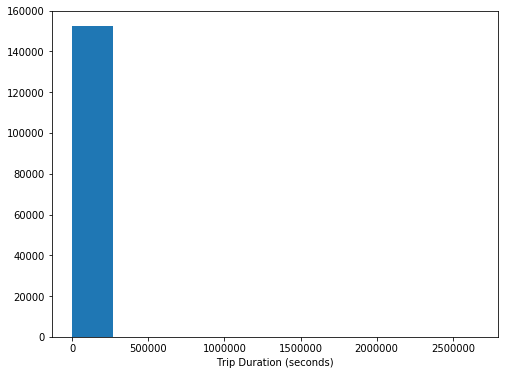

In [11]:
plt.figure(figsize=(8,6))
plt.hist(bayWheels.trip_duration)
plt.xlabel('Trip Duration (seconds)')

In [12]:
bayWheels['trip_duration_hours'] =  bayWheels.trip_duration /60.0

In [13]:
bayWheels.trip_duration_hours.describe(percentiles=[.99])

count    152446.000000
mean         25.842768
std         338.140773
min          -5.783333
50%          12.566667
99%         113.718333
max       44436.650000
Name: trip_duration_hours, dtype: float64

seems like we better get the values in minutes to better see results also there are outliers where the trip takes more than a day let's explore this using minutes,let's also remove the outliers.

Text(0.5, 0, 'Trip Duration (minuts)')

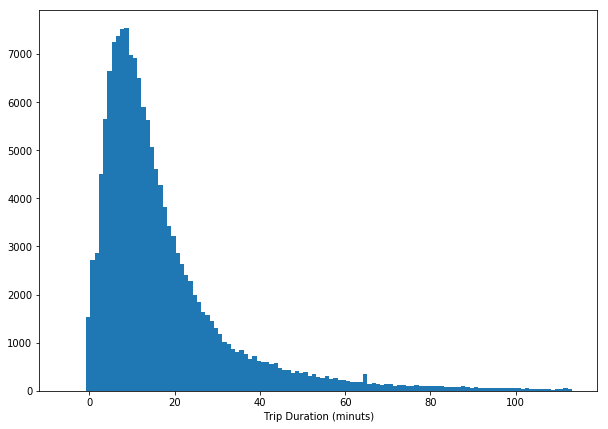

In [14]:
plt.figure(figsize=(10,7))
bins = np.arange(min(bayWheels[bayWheels.trip_duration_hours<114].trip_duration_hours),max(bayWheels[bayWheels.trip_duration_hours<114].trip_duration_hours),1)
plt.hist(bayWheels[bayWheels.trip_duration_hours<114].trip_duration_hours,bins=bins);
plt.xlabel('Trip Duration (minuts)')

* most of the trips durations are between 10 to 20 minutes 
* the distribution starting to decrease graudually so we can see that right skeweness
* 99% of the durations below 114 mins
* there are outliers in the data

In [15]:
bayWheels['day_of_trip'] = bayWheels['day_of_trip'].map({1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday',7:'Sunday'})

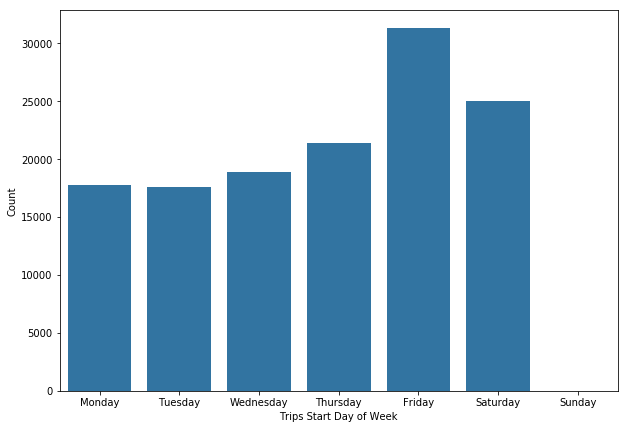

In [16]:
plt.figure(figsize=(10,7))
sb.countplot(data=bayWheels, x='day_of_trip', color=sb.color_palette()[0],order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']);
plt.xlabel('Trips Start Day of Week');
plt.ylabel('Count');

* Friday has the highest trips then Saturday 
* Sunday has no trips at all in September
* let's explore the hour of day i may legend the day of week too, maybe better explore the relationship between those two categories in the bivaraite section

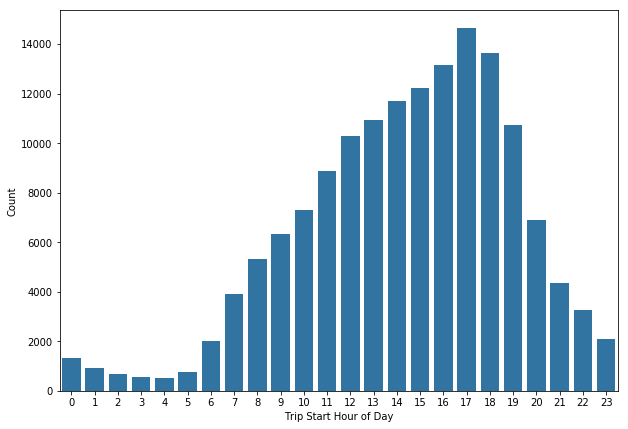

In [17]:
plt.figure(figsize=(10,7))
sb.countplot(bayWheels.hour_of_trip,color=sb.color_palette()[0])
plt.xlabel('Trip Start Hour of Day');
plt.ylabel('Count');

* most of the trip start hours within 4 am to 6 am with peak at 5 am
* few trips starts at the middle of the night 

In [18]:
bayWheels['ecludian_distance'].describe(percentiles=[.99])

count    152246.000000
mean          0.026103
std           0.667191
min           0.000000
50%           0.017473
99%           0.080000
max         128.079994
Name: ecludian_distance, dtype: float64

In [19]:
bayWheels['distance'] = bayWheels['ecludian_distance']*1000

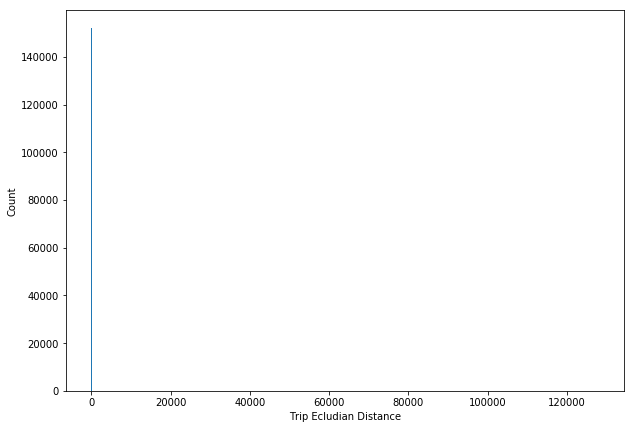

In [20]:
plt.figure(figsize=(10,7))
bins = np.arange(min(bayWheels.distance),max(bayWheels.distance),100)
plt.hist(bayWheels.distance,bins=bins)
plt.xlabel('Trip Ecludian Distance');
plt.ylabel('Count');

In [21]:
bayWheels.distance.describe(percentiles=[0.99])


count    152246.000000
mean         26.102514
std         667.190513
min           0.000000
50%          17.473126
99%          80.000000
max      128079.994062
Name: distance, dtype: float64

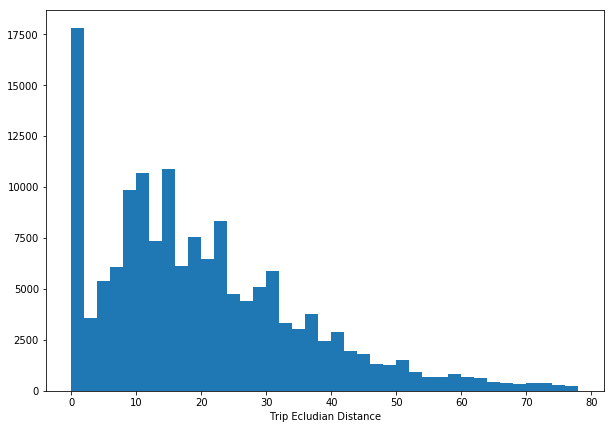

In [23]:
plt.figure(figsize=(10,7))
bins = np.arange(min(bayWheels[bayWheels['distance']<=80]['distance']),max(bayWheels[bayWheels['distance']<=80]['distance']),2)
plt.hist(bayWheels[bayWheels['distance']<=80]['distance'],bins=bins)
plt.xlabel('Trip Ecludian Distance');


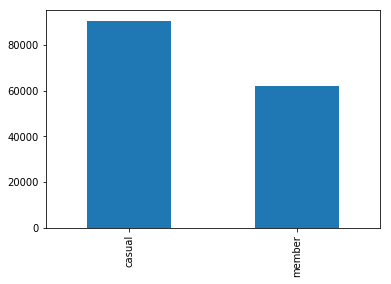

In [37]:
bayWheels.member_casual.value_counts().plot('bar')

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> * both the distance and the trip duration are right skewed distributions, and they both have an outliers i guess there might be a positive corrleation between those two variables, 
* i am curious to investigate if there are relationship between the day of week and the hour of day also the trip duration and the day of week.
* there is 9833 rides where the start station is the same as the end station
### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> the distribution of the ecludian distance was in a small scale as it depends on the long-lat data so i filtered the outliers also multiplied by 1000 to have a better visualization,
the Trip Duration distribution too, i filtered the outliers there was no need to change the scale.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [92]:
filtered2.distance.describe(percentiles=[0.99])

count    142413.000000
mean         27.901063
std         689.803223
min           0.000000
50%          19.015099
99%          80.622577
max      128079.994062
Name: distance, dtype: float64

Text(0.5, 1.0, 'Ecludian Distance Vs Trip Duration')

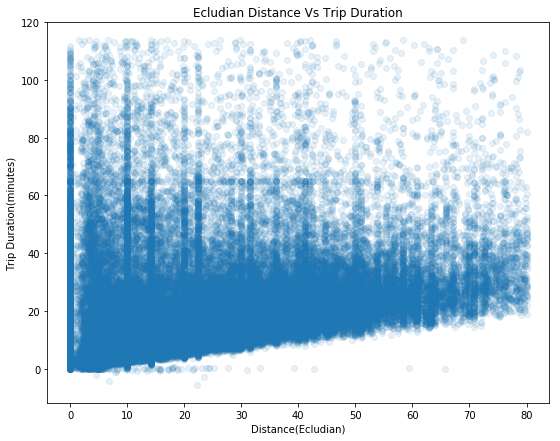

In [94]:
plt.figure(figsize=(9,7))
filtered = bayWheels[(bayWheels.distance<=80)&(bayWheels.trip_duration_hours<=114)]
plt.scatter(filtered2[(filtered2.distance<=80)&(filtered2.trip_duration_hours<=114)]['distance'],filtered2[(filtered2.distance<=80)&(filtered2.trip_duration_hours<=114)]['trip_duration_hours'],alpha=0.1)
plt.xlabel("Distance(Ecludian)")
plt.ylabel("Trip Duration(minutes)")
plt.title("Ecludian Distance Vs Trip Duration")

> this is very intersting as we can see there is two things to note:
* there is a correlation between the distance and the trip duration and this is logical
* although there are many points with zero ecludian distance and the trip duration increases means that the start and the end long-lats are the same.

Text(0, 0.5, 'Avg. Trip Duration in Minute')

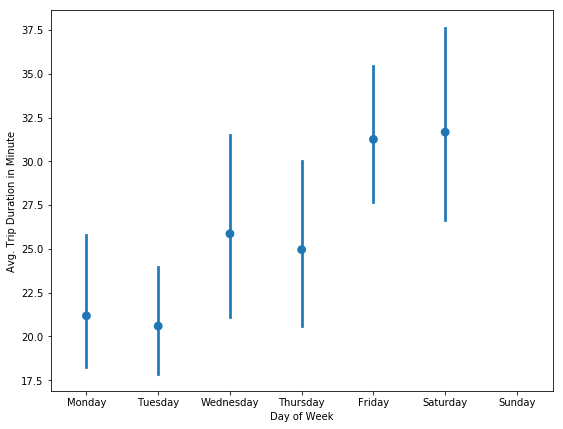

In [34]:
plt.figure(figsize=(9,7))
sb.pointplot(x=bayWheels.day_of_trip, y=bayWheels.trip_duration_hours, dodge=0.3,join=False,order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']);
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute')

* the average trip duration is at its maximum in friday and saturday 


In [61]:
filtered.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'day_of_trip', 'hour_of_trip', 'trip_duration',
       'ecludian_distance', 'trip_duration_hours', 'distance'],
      dtype='object')

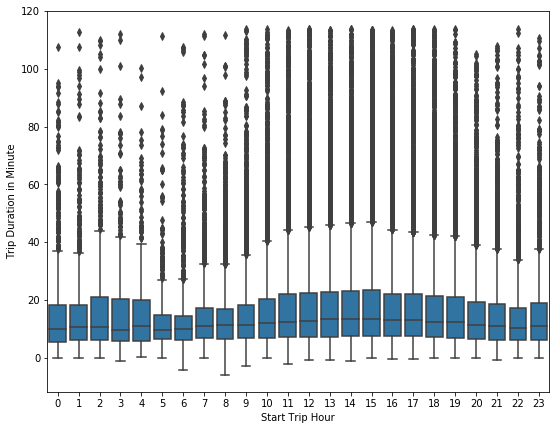

In [64]:
plt.figure(figsize=(9,7))
sb.boxplot(data=filtered, x='hour_of_trip', y='trip_duration_hours', color=sb.color_palette()[0]);
plt.xlabel('Start Trip Hour');
plt.ylabel('Trip Duration in Minute');

trip duration is most commonly less than 20 mins although there are some trips more than 100 mins, i can see no pattern between those variables.

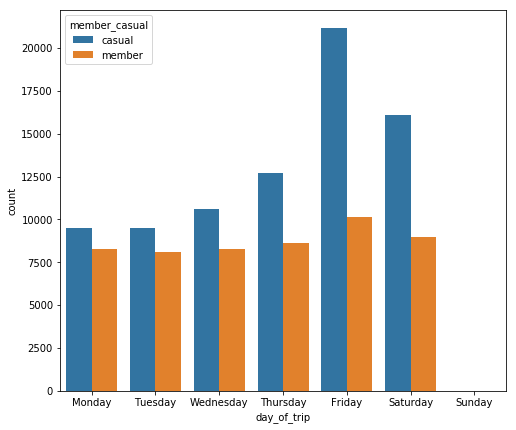

In [40]:
plt.figure(figsize=(8,7))
sb.countplot(data=bayWheels,x='day_of_trip',hue='member_casual',order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

>Most of Casual memebers participate on Friday 

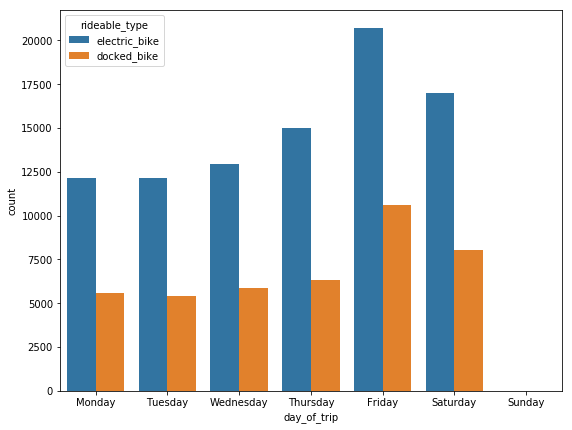

In [78]:
plt.figure(figsize=(9,7))
sb.countplot(data=bayWheels,x='day_of_trip',hue='rideable_type',order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

In [65]:
bayWheels.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'day_of_trip', 'hour_of_trip', 'trip_duration',
       'ecludian_distance', 'trip_duration_hours', 'distance'],
      dtype='object')

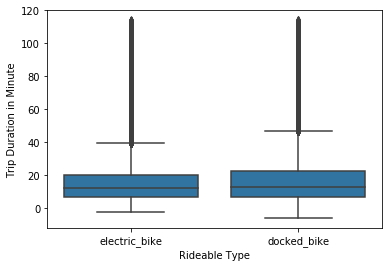

In [75]:
sb.boxplot(data=filtered, x='rideable_type', y='trip_duration_hours', color=sb.color_palette()[0]);
plt.xlabel('Rideable Type');
plt.ylabel('Trip Duration in Minute');

electric bikes tend to take less time in the trip than docked bikes

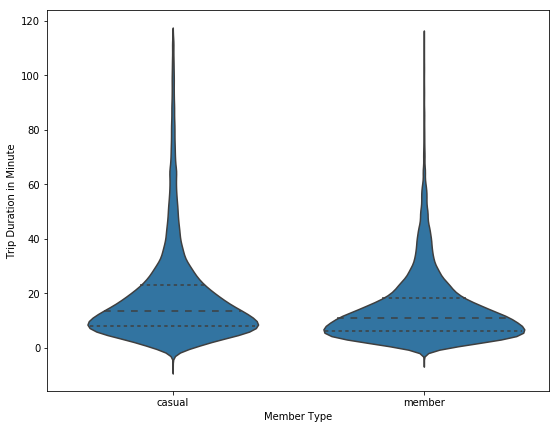

In [100]:
plt.figure(figsize=(9,7))
sb.violinplot(data=filtered, x='member_casual', y='trip_duration_hours', color=sb.color_palette()[0], inner='quartile');
plt.xlabel('Member Type');
plt.ylabel('Trip Duration in Minute');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>* there is a correlation between the distance and the trip duration
* Members tend to take the trip faster than casual Riders
* electric bike Riders tend to finish faster than Docked bike Riders


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> * Friday and Sataurday are the days were the most Casual Riders Participate.
* Electrical Bikes Mostly Twics The Docked Bikes in all days of Weeks
* There were No Rides on Sunday , I guess Aug 2020 Covid-19 Panadmic was still peaking so there might be a lockdown on sundays


## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

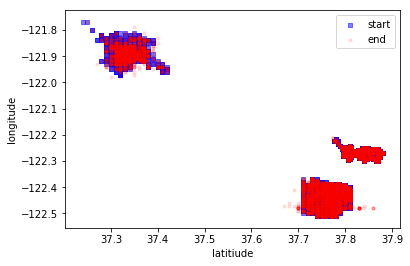

In [99]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(filtered.start_lat, filtered.start_lng, s=10, c='b', marker="s", label='start',alpha=0.5)
ax1.scatter(filtered.end_lat,filtered.end_lng, s=10, c='r', marker="o", label='end',alpha=0.1)
plt.legend();
plt.xlabel('latitiude')
plt.ylabel('longitude')
plt.show()

> This is an intersting graph after removing the outliers we can see a three main regions where the trips start and end

Text(0, 0.5, 'Avg. Trip Duration in Minute')

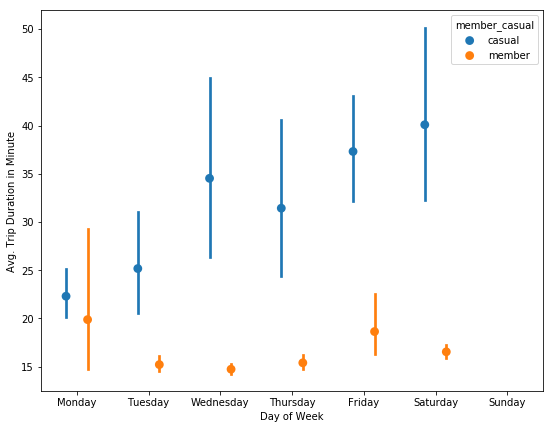

In [81]:
plt.figure(figsize=(9,7))
sb.pointplot(x=bayWheels.day_of_trip, y=bayWheels.trip_duration_hours,hue=bayWheels.member_casual, dodge=0.3,join=False,order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']);
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute')

Members Riders Tend To End the Trip Faster than Casual Riders in all Days of Week

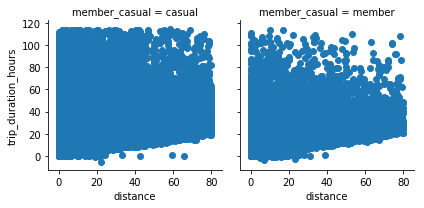

In [97]:
g = sb.FacetGrid(data=filtered2[(filtered2.distance<=80)&(filtered2.trip_duration_hours<=114)],col='member_casual')
g.map(plt.scatter,'distance','trip_duration_hours')


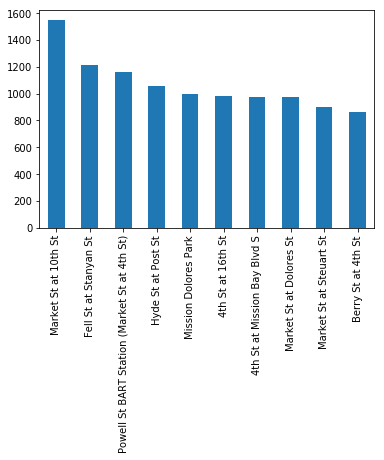

In [98]:
bayWheels.start_station_name.value_counts()[:10].plot('bar')

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> * There are Three Main Region Where the rides take place
* Members Tend to finish faster than Casual Riders In all days of Weeks
* There is a Positive Correlation Between Distance and Trip Duration.

### Were there any interesting or surprising interactions between features?

> * There are Three Main Region Where the rides take place that was surprising as there were alot of stations but they are all clustered around three regions
* The Ecludian distance might be zero this means that the start and the end are in the same station 